# Import Airlines Data

In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Import 'closing' prices data (5th column) from each Airlines dataset. 

In [3]:
alaska_train = pd.read_csv('AlaskaAirlines.csv')
alaska_train_set = alaska_train.iloc[:, 4:5].values

american_train = pd.read_csv('AmericanAirlines.csv')
american_train_set = american_train.iloc[:, 4:5].values

delta_train = pd.read_csv('DeltaAirlines.csv')
delta_train_set = delta_train.iloc[:, 4:5].values

hawaiian_train = pd.read_csv('HawaiianAirlines.csv')
hawaiian_train_set = hawaiian_train.iloc[:, 4:5].values

southwest_train = pd.read_csv('SouthWestAirlines.csv')
southwest_train_set = southwest_train.iloc[:, 4:5].values

united_train = pd.read_csv('UnitedAirlines.csv')
united_train_set = united_train.iloc[:, 4:5].values

In [ ]:
len(alaska_train_set)

2245

# Create Dataset

## Create a dataset containing closing prices for all airlines 

In [4]:
from numpy import hstack
dataset_train = hstack((alaska_train_set, american_train_set, delta_train_set, hawaiian_train_set, southwest_train_set, united_train_set))
dataset_train[0]

array([19.75677109, 13.17952538, 10.86325741, 30.55924225,  9.77912426,
       24.19000053])

In [5]:
len(dataset_train)

2266

# Correlation Matrix

In [6]:
dataframe = pd.DataFrame.from_records(dataset_train)
dataframe.corr()

,0,1,2,3,4,5
0,1.000000,0.679231,0.791666,0.084343,0.794838,0.717106
1,0.679231,1.000000,0.554114,0.610499,0.421299,0.582606
2,0.791666,0.554114,1.000000,-0.105077,0.903627,0.899284
3,0.084343,0.610499,-0.105077,1.000000,-0.244679,0.013302
4,0.794838,0.421299,0.903627,-0.244679,1.000000,0.756458
5,0.717106,0.582606,0.899284,0.013302,0.756458,1.000000


# **Transform Data**

*  Using MinMax scaler to normalize the data



In [7]:
# As we now, we need to scale our dataet
# Feature Scaling using MinMax scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
dataset_train_scaled = sc.fit_transform(dataset_train)

In [8]:
dataset_train_scaled[0]

array([0.        , 0.08633233, 0.        , 0.43492739, 0.        ,
       0.05561345])

# Training Data

## Create 'Training' data based on window size selection

In [9]:
window=30

In [10]:
X_train = []
y_train = []
for i in range(window, len(dataset_train)):
    X_train.append(dataset_train_scaled[i-window:i, :])
    y_train.append(dataset_train_scaled[i, :])
    
X_train, y_train = np.array(X_train), np.array(y_train)

In [11]:
X_train.shape

(2236, 30, 6)

In [12]:
# Reshaping the data so that it fits the format required for the RNN input layer
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 6))
# 3D data structure (tensor) allowing for more than 1 variable, (number of observations,number of time steps,6)
X_train.shape

(2236, 30, 6)

# Test Data

## create 'Test' Data

In [13]:
alaska_test = pd.read_csv('AlaskaAirlines_test.csv')
alaska_test_set = alaska_test.iloc[:, 4:5].values

american_test = pd.read_csv('AmericanAirlines_test.csv')
american_test_set = american_test.iloc[:, 4:5].values

delta_test = pd.read_csv('DeltaAirlines_test.csv')
delta_test_set = delta_test.iloc[:, 4:5].values

hawaiian_test = pd.read_csv('HawaiianAirlines_test.csv')
hawaiian_test_set = hawaiian_test.iloc[:, 4:5].values

southwest_test = pd.read_csv('SouthWestAirlines_test.csv')
southwest_test_set = southwest_test.iloc[:, 4:5].values

united_test = pd.read_csv('UnitedAirlines_test.csv')
united_test_set = united_test.iloc[:, 4:5].values

In [14]:
len(united_test_set)

62

In [15]:
from numpy import vstack
dataset_test = hstack((alaska_test_set, american_test_set, delta_test_set, hawaiian_test_set, southwest_test_set, united_test_set))
dataset_total = vstack((dataset_train, dataset_test))
len(dataset_total)

2328

In [16]:
inputs = dataset_total[(len(dataset_total)-len(dataset_test)-window):]
len(inputs)
inputs = sc.transform(inputs) 

In [17]:
X_test = []
y_test = []
for i in range(window, len(inputs)):
    X_test.append(inputs[i-window:i, :])
    y_test.append(inputs[i, :])
    
X_test, y_test = np.array(X_test), np.array(y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 6))

In [18]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(2236, 30, 6) (2236, 6) (62, 30, 6) (62, 6)


# RNN model

## Building the first RNN model with LSTM

In [19]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Model
print(tf.__version__)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.9.2


In [22]:
# Initialisi#ng the RNN
ts= keras.Sequential()

# Adding the first LSTM layer and some Dropout regularisation
ts.add(layers.LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
ts.add(layers.Dropout(0.2))  #randomly drops 20% of observations to avoid overfitting

# Adding a second LSTM layer and some Dropout regularisation
# Note that the "return_sequences=False (default value)" for the last RNN layer and True for previous layers
ts.add(layers.LSTM(units = 50)) 
ts.add(layers.Dropout(0.2))

# Adding the output layer
ts.add(layers.Dense(units = 6))


In [23]:
ts.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 30, 50)            11400     
                                                                 
 dropout_2 (Dropout)         (None, 30, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_3 (Dropout)         (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 6)                 306       
                                                                 
Total params: 31,906
Trainable params: 31,906
Non-trainable params: 0
_________________________________________________________________


In [24]:
# we use "Mean Squared Error" as our loss function 
ts.compile(optimizer = 'adam', #can also try  optimizer='rmsprop'
           loss = 'mean_squared_error', # mean_absolute_error
           metrics=['MeanSquaredError', 'MeanAbsoluteError', 'MeanAbsolutePercentageError']) #MSE, MAE, MAPE

In [25]:
# Fitting the RNN to the Training set
history_LSTM=ts.fit(X_train, y_train, 
               epochs = 60, batch_size = 30,verbose=1,
               validation_data=(X_test,y_test))

Epoch 1/60
75/75 [==============================] - 8s 46ms/step - loss: 0.0396 - mean_squared_error: 0.0396 - mean_absolute_error: 0.1454 - mean_absolute_percentage_error: 49314.2500 - val_loss: 0.0059 - val_mean_squared_error: 0.0059 - val_mean_absolute_error: 0.0666 - val_mean_absolute_percentage_error: 20.8196
Epoch 2/60
75/75 [==============================] - 2s 32ms/step - loss: 0.0126 - mean_squared_error: 0.0126 - mean_absolute_error: 0.0869 - mean_absolute_percentage_error: 20091.6211 - val_loss: 0.0044 - val_mean_squared_error: 0.0044 - val_mean_absolute_error: 0.0549 - val_mean_absolute_percentage_error: 16.1611
Epoch 3/60
75/75 [==============================] - 2s 32ms/step - loss: 0.0098 - mean_squared_error: 0.0098 - mean_absolute_error: 0.0766 - mean_absolute_percentage_error: 20753.9961 - val_loss: 0.0037 - val_mean_squared_error: 0.0037 - val_mean_absolute_error: 0.0500 - val_mean_absolute_percentage_error: 13.5885
Epoch 4/60
75/75 [==============================] - 

## Evaluating the LSTM network and making predictions
Visualizing the loss (MSE) as the model trains over several epochs

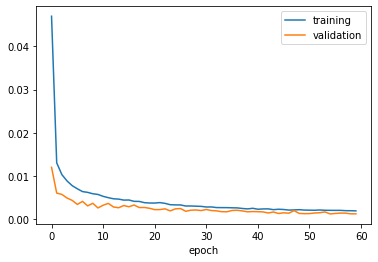

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history_LSTM.history['loss'],label="training")
plt.plot(history_LSTM.history['val_loss'],label="validation")
plt.xlabel("epoch")
plt.legend()
plt.show()

In [ ]:
predicted_stock_price = ts.predict(X_test)
# note that we need to inverse_transform the predicted values 
# because the predictions are on the scaled [0,1] range (we MinMax scaled our data before training)
predicted_stock_price_LSTM = sc.inverse_transform(predicted_stock_price)

In [ ]:
alaska_real_stock_price = dataset_test[:, 0:1]
american_real_stock_price = dataset_test[:, 1:2]
delta_real_stock_price = dataset_test[:, 2:3]
hawaiian_real_stock_price = dataset_test[:, 3:4]
southwest_real_stock_price = dataset_test[:, 4:5]
united_real_stock_price = dataset_test[:, 5:6]

In [ ]:
alaska_predicted_stock_price_LSTM = predicted_stock_price_LSTM[:, 0:1]
american_predicted_stock_price_LSTM = predicted_stock_price_LSTM[:, 1:2]
delta_predicted_stock_price_LSTM = predicted_stock_price_LSTM[:, 2:3]
hawaiian_predicted_stock_price_LSTM = predicted_stock_price_LSTM[:, 3:4]
southwest_predicted_stock_price_LSTM = predicted_stock_price_LSTM[:, 4:5]
united_predicted_stock_price_LSTM = predicted_stock_price_LSTM[:, 5:6]

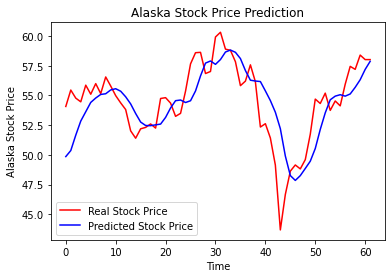

In [ ]:
# Visualising the results
plt.plot(alaska_real_stock_price, color = 'red', label = 'Real Stock Price')
plt.plot(alaska_predicted_stock_price_LSTM, color = 'blue', label = 'Predicted Stock Price')
plt.title('Alaska Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Alaska Stock Price')
plt.legend()
plt.show()

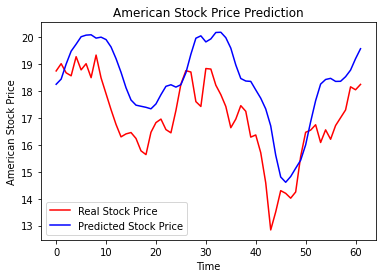

In [ ]:
# Visualising the results
plt.plot(american_real_stock_price, color = 'red', label = 'Real Stock Price')
plt.plot(american_predicted_stock_price_LSTM, color = 'blue', label = 'Predicted Stock Price')
plt.title('American Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('American Stock Price')
plt.legend()
plt.show()

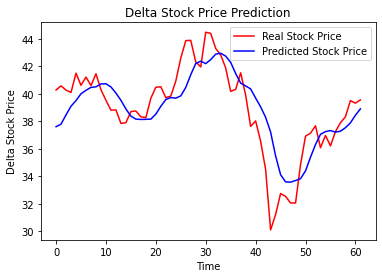

In [ ]:
# Visualising the results
plt.plot(delta_real_stock_price, color = 'red', label = 'Real Stock Price')
plt.plot(delta_predicted_stock_price_LSTM, color = 'blue', label = 'Predicted Stock Price')
plt.title('Delta Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Delta Stock Price')
plt.legend()
plt.show()

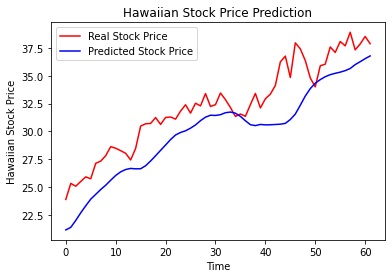

In [ ]:
# Visualising the results
plt.plot(hawaiian_real_stock_price, color = 'red', label = 'Real Stock Price')
plt.plot(hawaiian_predicted_stock_price_LSTM, color = 'blue', label = 'Predicted Stock Price')
plt.title('Hawaiian Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Hawaiian Stock Price')
plt.legend()
plt.show()

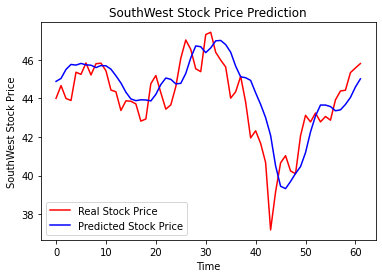

In [ ]:
# Visualising the results
plt.plot(southwest_real_stock_price, color = 'red', label = 'Real Stock Price')
plt.plot(southwest_predicted_stock_price_LSTM, color = 'blue', label = 'Predicted Stock Price')
plt.title('SouthWest Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('SouthWest Stock Price')
plt.legend()
plt.show()

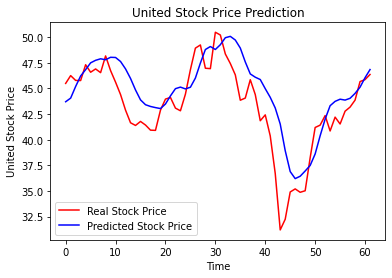

In [ ]:
# Visualising the results
plt.plot(united_real_stock_price, color = 'red', label = 'Real Stock Price')
plt.plot(united_predicted_stock_price_LSTM, color = 'blue', label = 'Predicted Stock Price')
plt.title('United Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('United Stock Price')
plt.legend()
plt.show()

In [ ]:
from sklearn import metrics
import math
#print('Coefficients: \n', lin_reg.coef_) #regression coefficients
print("Metrics for Alaska Airlines")
print("Root Mean squared error: %.2f" % math.sqrt(metrics.mean_squared_error(alaska_real_stock_price, alaska_predicted_stock_price_LSTM))) #RMSE
print("Mean absolute error: %.2f" % metrics.mean_absolute_error(alaska_real_stock_price, alaska_predicted_stock_price_LSTM)) #MAE

print("Metrics for American Airlines")
print("Root Mean squared error: %.2f" % math.sqrt(metrics.mean_squared_error(american_real_stock_price, american_predicted_stock_price_LSTM))) #RMSE
print("Mean absolute error: %.2f" % metrics.mean_absolute_error(american_real_stock_price, american_predicted_stock_price_LSTM)) #MAE

print("Metrics for Delta Airlines")
print("Root Mean squared error: %.2f" % math.sqrt(metrics.mean_squared_error(delta_real_stock_price, delta_predicted_stock_price_LSTM))) #RMSE
print("Mean absolute error: %.2f" % metrics.mean_absolute_error(delta_real_stock_price, delta_predicted_stock_price_LSTM)) #MAE

print("Metrics for Hawaiian Airlines")
print("Root Mean squared error: %.2f" % math.sqrt(metrics.mean_squared_error(hawaiian_real_stock_price, hawaiian_predicted_stock_price_LSTM))) #RMSE
print("Mean absolute error: %.2f" % metrics.mean_absolute_error(hawaiian_real_stock_price, hawaiian_predicted_stock_price_LSTM)) #MAE

print("Metrics for SouthWest Airlines")
print("Root Mean squared error: %.2f" % math.sqrt(metrics.mean_squared_error(southwest_real_stock_price, southwest_predicted_stock_price_LSTM))) #RMSE
print("Mean absolute error: %.2f" % metrics.mean_absolute_error(southwest_real_stock_price, southwest_predicted_stock_price_LSTM)) #MAE

print("Metrics for United Airlines")
print("Root Mean squared error: %.2f" % math.sqrt(metrics.mean_squared_error(united_real_stock_price, united_predicted_stock_price_LSTM))) #RMSE
print("Mean absolute error: %.2f" % metrics.mean_absolute_error(united_real_stock_price, united_predicted_stock_price_LSTM)) #MAE

Metrics for Alaska Airlines
Root Mean squared error: 2.26
Mean absolute error: 1.70
Metrics for American Airlines
Root Mean squared error: 1.61
Mean absolute error: 1.40
Metrics for Delta Airlines
Root Mean squared error: 1.86
Mean absolute error: 1.43
Metrics for Hawaiian Airlines
Root Mean squared error: 2.66
Mean absolute error: 2.31
Metrics for SouthWest Airlines
Root Mean squared error: 1.31
Mean absolute error: 1.04
Metrics for United Airlines
Root Mean squared error: 2.72
Mean absolute error: 2.07
